In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("swiggy.csv")

ParserError: Error tokenizing data. C error: EOF inside string starting at row 13532

In [ ]:
data.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


# Step 1: Handling Missing Values
Check for missing values

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64


Drop rows with missing values (if necessary)

In [ ]:
data.dropna(inplace=True)

# Step 2: Data Type Conversion
Convert numerical columns to appropriate data types

In [ ]:
# Replace non-numeric values with NaN
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')

# Replace NaN values with 0 or any other appropriate default value
data['rating_count'].fillna(0, inplace=True)

# Convert to integer
data['rating_count'] = data['rating_count'].astype(int)

# Remove special characters and convert to float
data['cost'] = data['cost'].replace('[^\d.]', '', regex=True).astype(float)

data['cost'] = data['cost'].astype(float)

# Step 3: Cleaning Text Data
Strip leading and trailing whitespace from text columns

In [ ]:
data['name'] = data['name'].str.strip()
data['city'] = data['city'].str.strip()
data['cuisine'] = data['cuisine'].str.strip()
data['address'] = data['address'].str.strip()
data['menu'] = data['menu'].str.strip()

# Step 4: Dealing with Duplicates
Remove duplicate rows

In [ ]:
data.drop_duplicates(inplace=True)

# Step 5: Feature Engineering (if needed)
Example: Calculate a weighted rating based on 'rating' and 'rating_count'

In [ ]:
# Convert 'rating' to numeric (in case it's not already)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Calculate weighted rating only if both 'rating' and 'rating_count' are numeric
data['weighted_rating'] = 0  # Initialize with default value
mask = (pd.notnull(data['rating']) & pd.notnull(data['rating_count']))
data.loc[mask, 'weighted_rating'] = (data.loc[mask, 'rating'] * data.loc[mask, 'rating_count']) / (data['rating_count'].sum())

In [ ]:
# Print the preprocessed data
print("Preprocessed Data:")
print(data.head())

Preprocessed Data:
       id               name    city  rating  rating_count   cost  \
0  567335     AB FOODS POINT  Abohar     NaN             0  200.0   
1  531342  Janta Sweet House  Abohar     4.4             0  200.0   
2  158203  theka coffee desi  Abohar     3.8             0  100.0   
3  187912          Singh Hut  Abohar     3.7             0  250.0   
4  543530      GRILL MASTERS  Abohar     NaN             0  250.0   

                      cuisine          lic_no  \
0            Beverages,Pizzas  22122652000138   
1               Sweets,Bakery  12117201000112   
2                   Beverages  22121652000190   
3            Fast Food,Indian  22119652000167   
4  Italian-American,Fast Food  12122201000053   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/singh-hut

In [ ]:
# Save the preprocessed data to a new CSV file
data.to_csv("preprocessed_data.csv")

#EDA
1. Restaurant Ratings Analysis

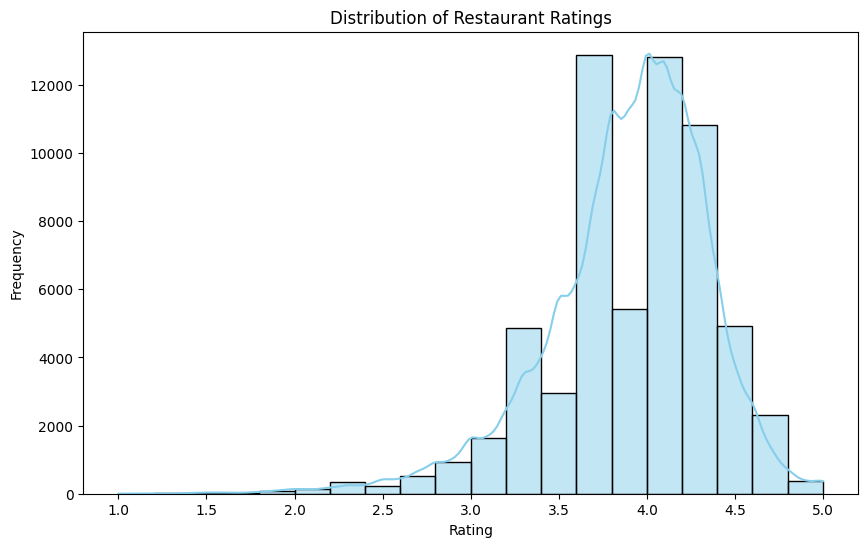

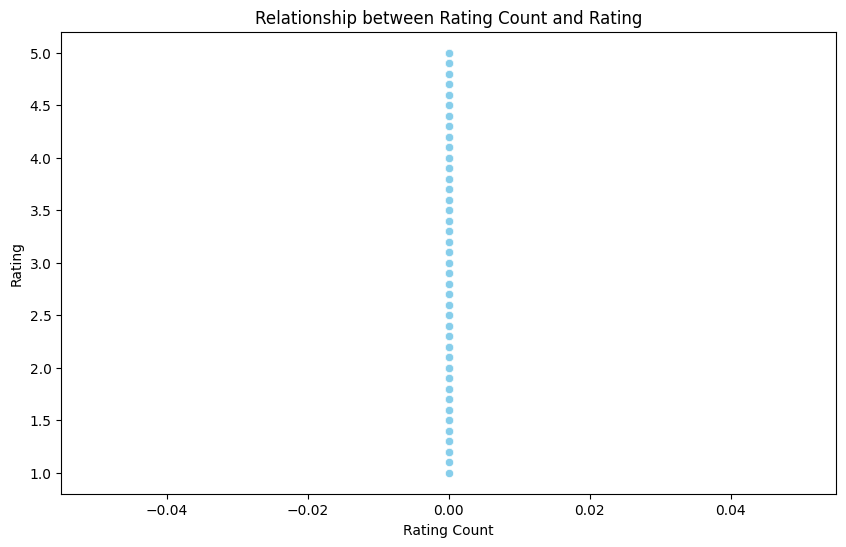

In [ ]:
import seaborn as sns

# Distribution of restaurant ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Relationship between rating and rating count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='rating_count', y='rating', color='skyblue')
plt.title('Relationship between Rating Count and Rating')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()


2. Popular Cuisines Analysis

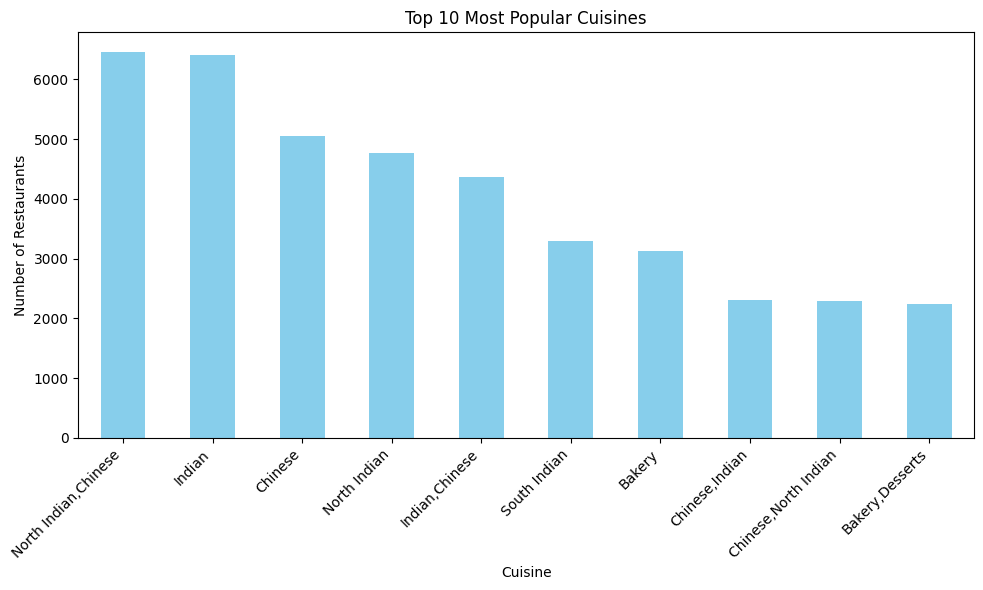

In [ ]:
# Count the occurrences of each cuisine
popular_cuisines = data['cuisine'].value_counts().head(10)

# Plot the top 10 most popular cuisines
plt.figure(figsize=(10, 6))
popular_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Cost Analysis and Relationship with Ratings

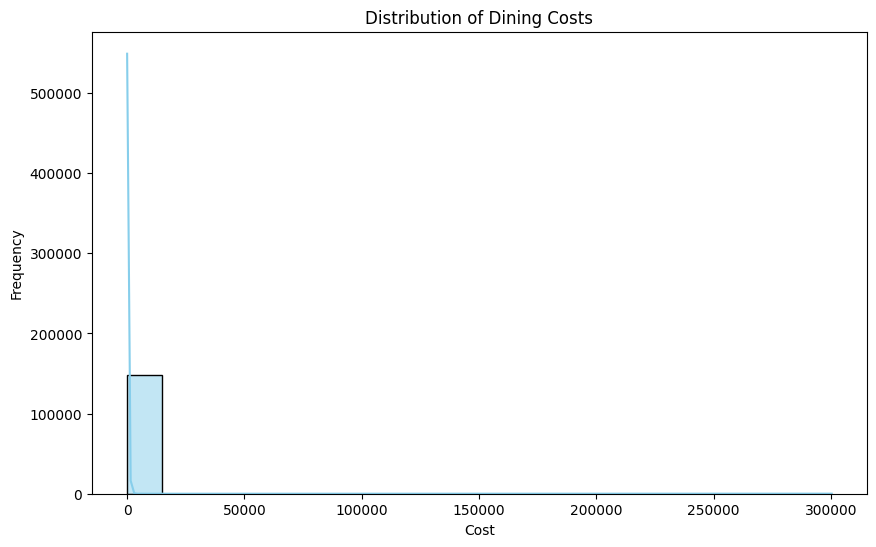

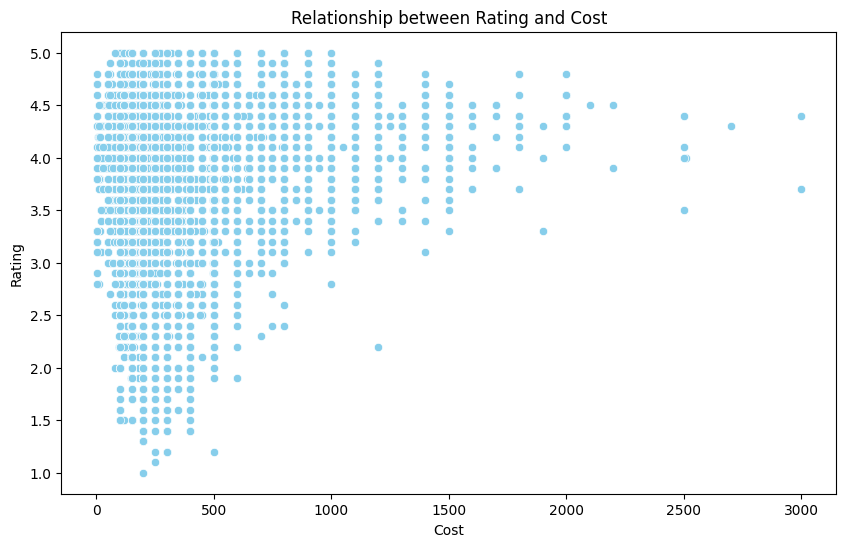

In [ ]:
# Distribution of dining costs
plt.figure(figsize=(10, 6))
sns.histplot(data['cost'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Dining Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of rating vs. cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='cost', y='rating', color='skyblue')
plt.title('Relationship between Rating and Cost')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.show()

4. Rating Count vs. Rating

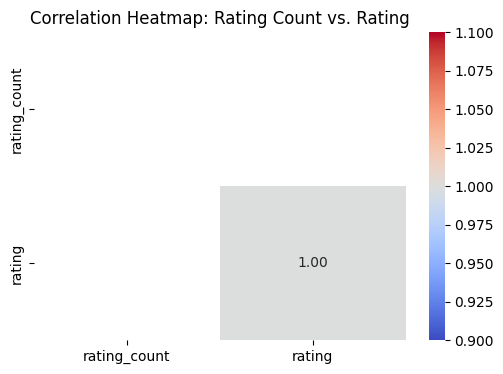

In [ ]:
# Correlation matrix
correlation_matrix = data[['rating_count', 'rating']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Rating Count vs. Rating')
plt.show()

5. Average Rating by Cuisine

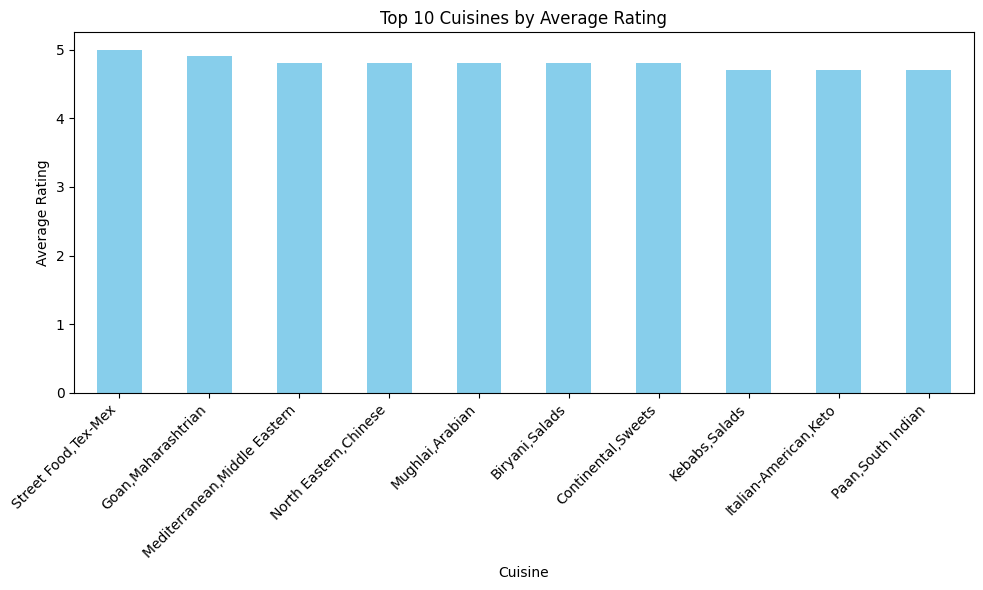

In [ ]:
# Group by cuisine and calculate the average rating
avg_rating_by_cuisine = data.groupby('cuisine')['rating'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 cuisines by average rating
plt.figure(figsize=(10, 6))
avg_rating_by_cuisine.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Rating Distribution by City for Top 10 cities


<ipython-input-30-0d4f8e5993e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_top_10_cities, x='city', y='rating', palette='Set2', order=top_10_cities)


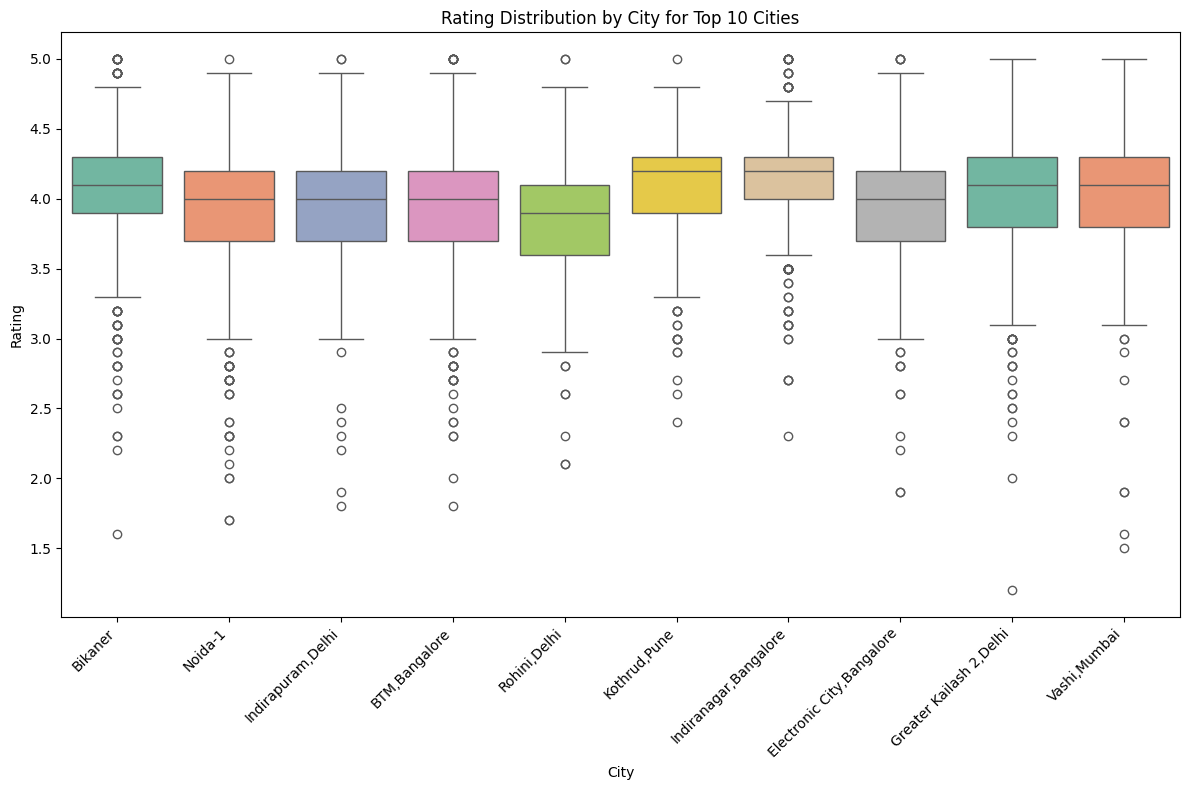

In [ ]:
# Get the top 10 cities with the highest number of restaurants
top_10_cities = data['city'].value_counts().head(10).index

# Filter the data for the top 10 cities
data_top_10_cities = data[data['city'].isin(top_10_cities)]

# Boxplot of rating by city for the top 10 cities
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_top_10_cities, x='city', y='rating', palette='Set2', order=top_10_cities)
plt.title('Rating Distribution by City for Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Predictive Modelling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

# Load the preprocessed data
data = pd.read_csv("preprocessed_data.csv")

# Prepare the data by selecting relevant features and splitting it into training and testing sets
X = data[['rating', 'cost', 'weighted_rating', 'cuisine']]
# Perform one-hot encoding for the 'cuisine' column
X = pd.get_dummies(data=X, columns=['cuisine'], drop_first=True)
y = data['rating_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform mean imputation for missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Model Selection
model = RandomForestRegressor()

# Model Training
model.fit(X_train_imputed, y_train)

# Model Evaluation
y_pred = model.predict(X_test_imputed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): nan


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0
